In [1]:
from IPython.display import display, HTML 
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<b><font color='red' size='6'>ch12. 데이터 시각화</font></b>
- 시각화 라이브러리 : matplotlib, seaborn(데이터시각화), folium(지도시각화)
    * matplotlib : 파이썬에서 가장 쉽게 많이 사용하는 시각화 라이브러리. 판다스에 포함
    * seaborn : matplotlib 기반으로 다양한 색, 테마, 차트 기능과 groupby 기능 포함된 라이브러리

# 1절 matplotlib
- [matplotlib](https://matplotlib.org/stable/api/pyplot_summary.html)

## 1.1 패키지 import 및 기본 설정

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
# 한글설정

# warning(경고) 안보이게

## 1.2 그래프 그리기
- matplotlib으로 그래프 그리기 위한 단계
    1. 데이터 준비
    2. 그래프 생성
    3. 그래프 함수로 그리기
    4. 그래프 커스터마이징
    5. 그래프 출력 및 저장

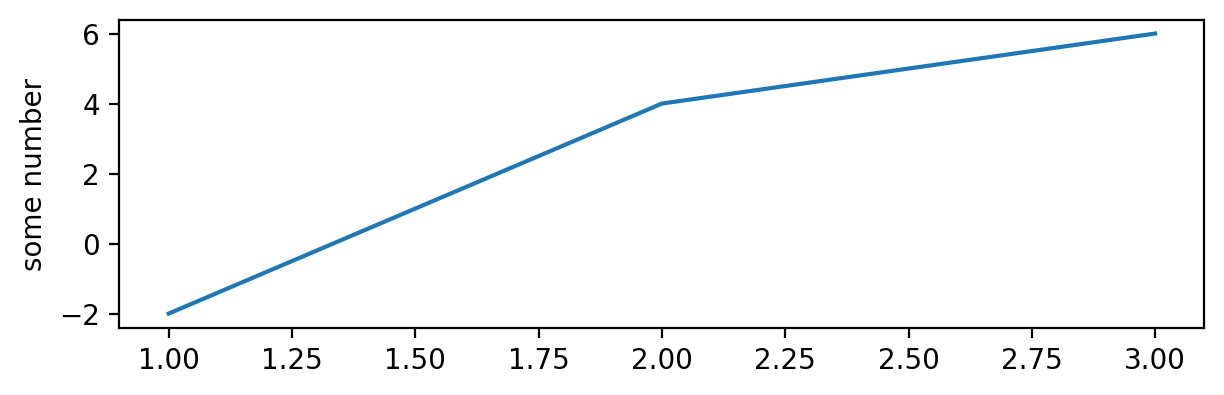

In [16]:
# 1) 데이터 준비
x = [1,2,3] 
y = [-2,4,6]
# 2) 그래프 객체 생성
plt.figure(figsize = (7,2))
# 3) 그래프 함수
plt.plot(x, y,)
# 4) 커스터마이징
plt.ylabel('some number')
# 5) 그래프 화면 출력
plt.show()

## 1.3 그래프 영역 나누기
### 1) subplot()함수로 서브플롯 추가

In [30]:
import numpy as np
x = np.arange(0, 10, 0.1)
len(x)

100

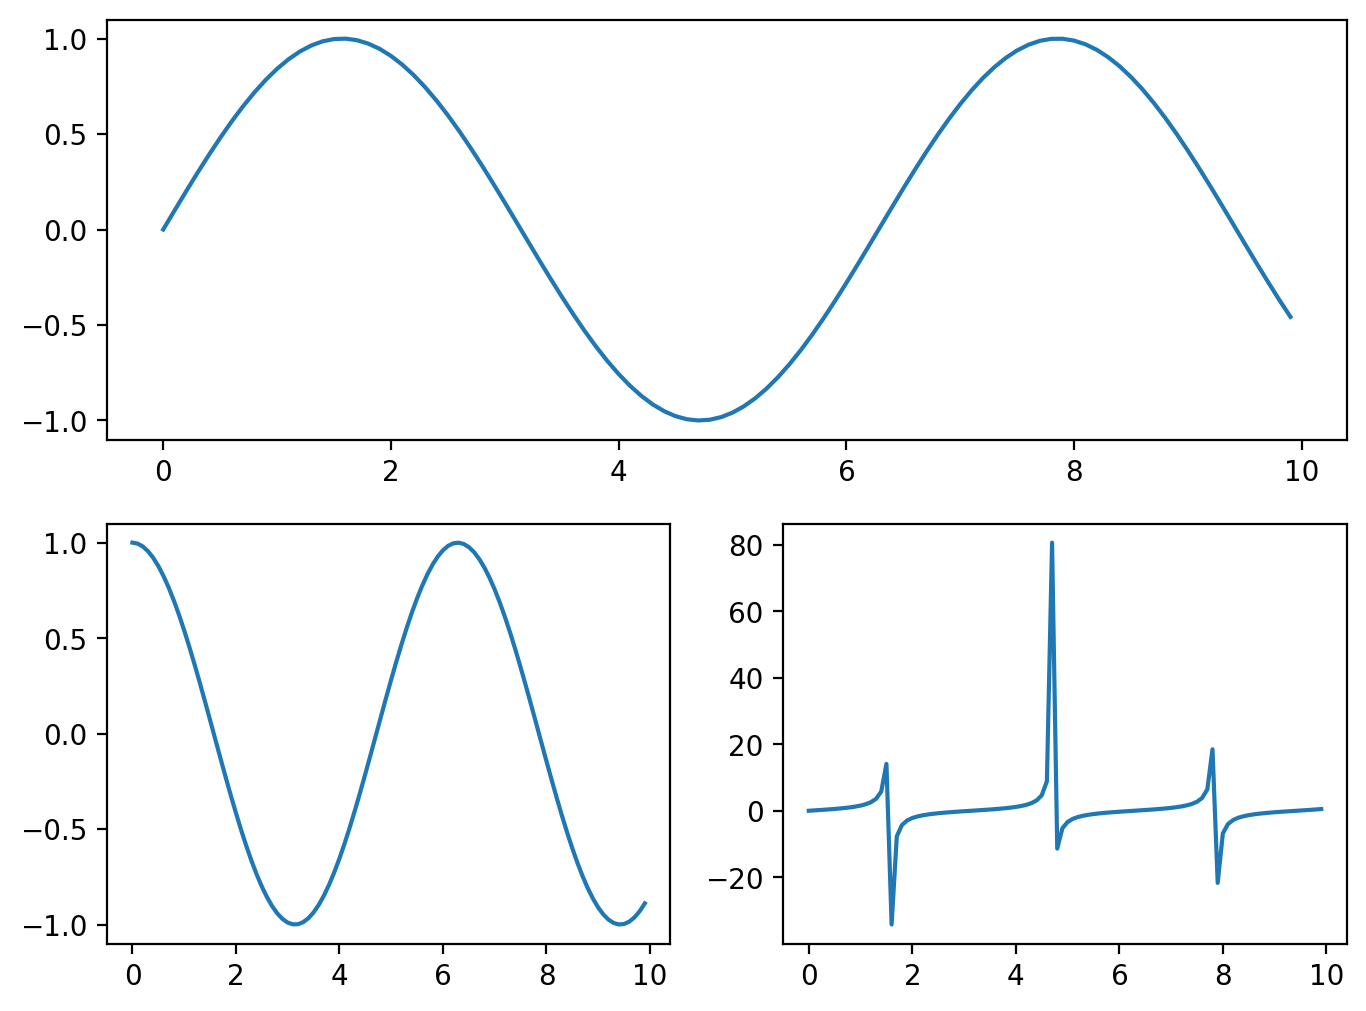

In [32]:
plt.figure(figsize=(8,6))
plt.subplot(2, 1, 1) ; plt.plot(x, np.sin(x))
plt.subplot(2, 2, 3) ; plt.plot(x, np.cos(x))
plt.subplot(2, 2, 4) ; plt.plot(x, np.tan(x))
plt.show()

### 2) subplots() 함수로 subplot 추가하기

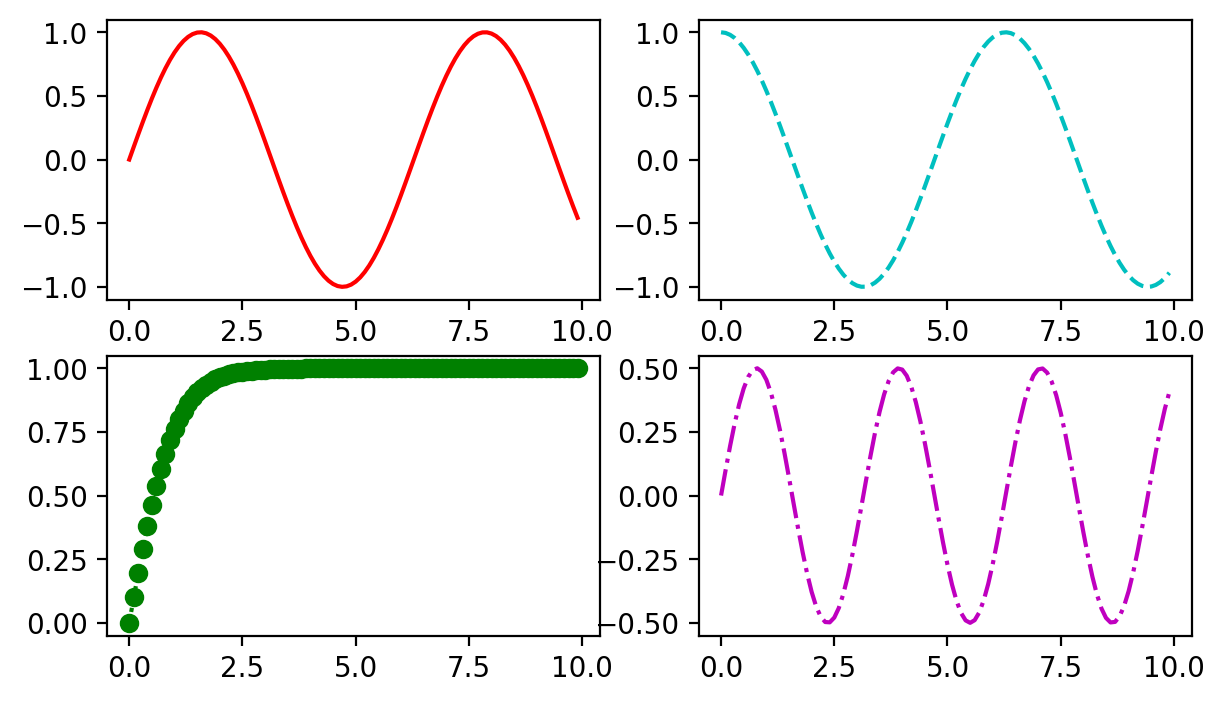

In [56]:
fig, axes = plt.subplots(2,2, figsize=(7,4))
axes[0,0].plot(x, np.sin(x),'r') 
axes[0,1].plot(x, np.cos(x), 'c--')
axes[1,0].plot(x, np.tanh(x), 'go:')
axes[1,1].plot(x, np.sin(x)*np.cos(x), 'm-.')
plt.show()

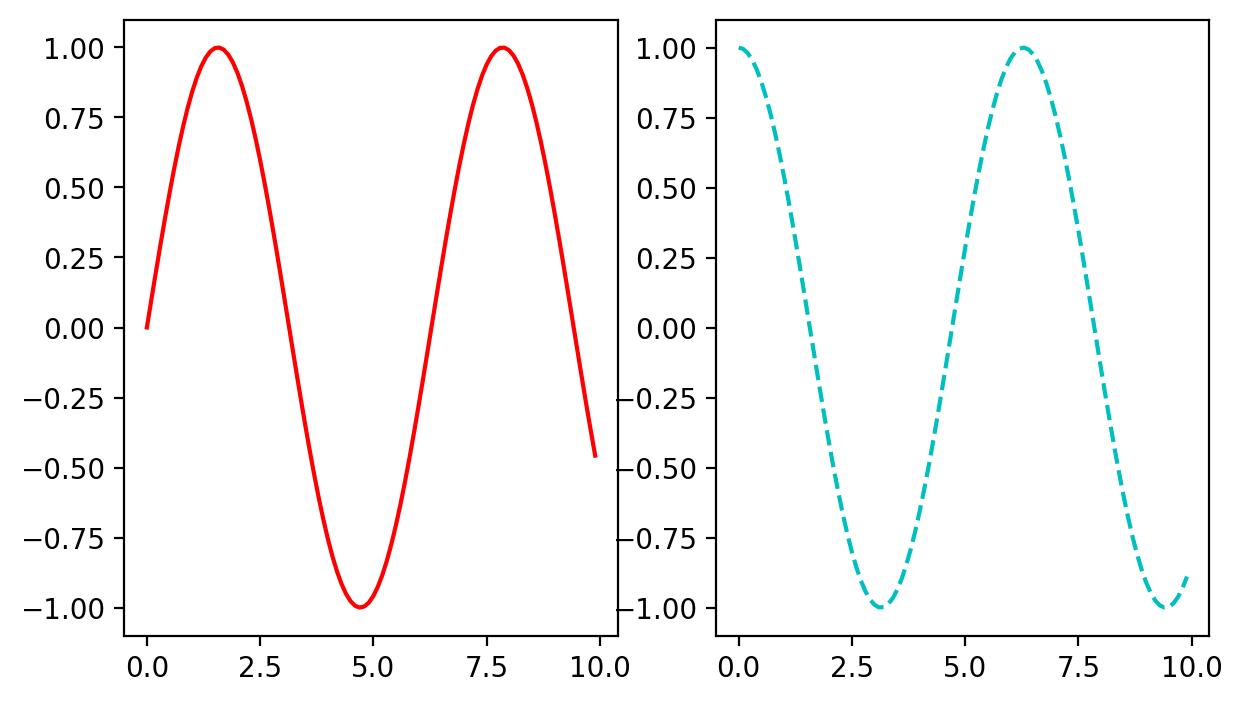

In [64]:
fig, axes = plt.subplots(1,2, figsize=(7,4))
axes[0].plot(x, np.sin(x),'r') 
axes[1].plot(x, np.cos(x), 'c--')
plt.show()

### 3) pandas.DataFrame.plot()
- plt.plot(x, y, fmt)
- df.plot(x=열이름, y=열이름, figsize, title, xlim, ylim...)
    * kind : line(기본값), scatter(점도표), bar, barh, box, pie, density
    * xlim, ylim : list/tuple

In [66]:
from seaborn import load_dataset
iris = load_dataset('iris')
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
88,5.6,3.0,4.1,1.3,versicolor


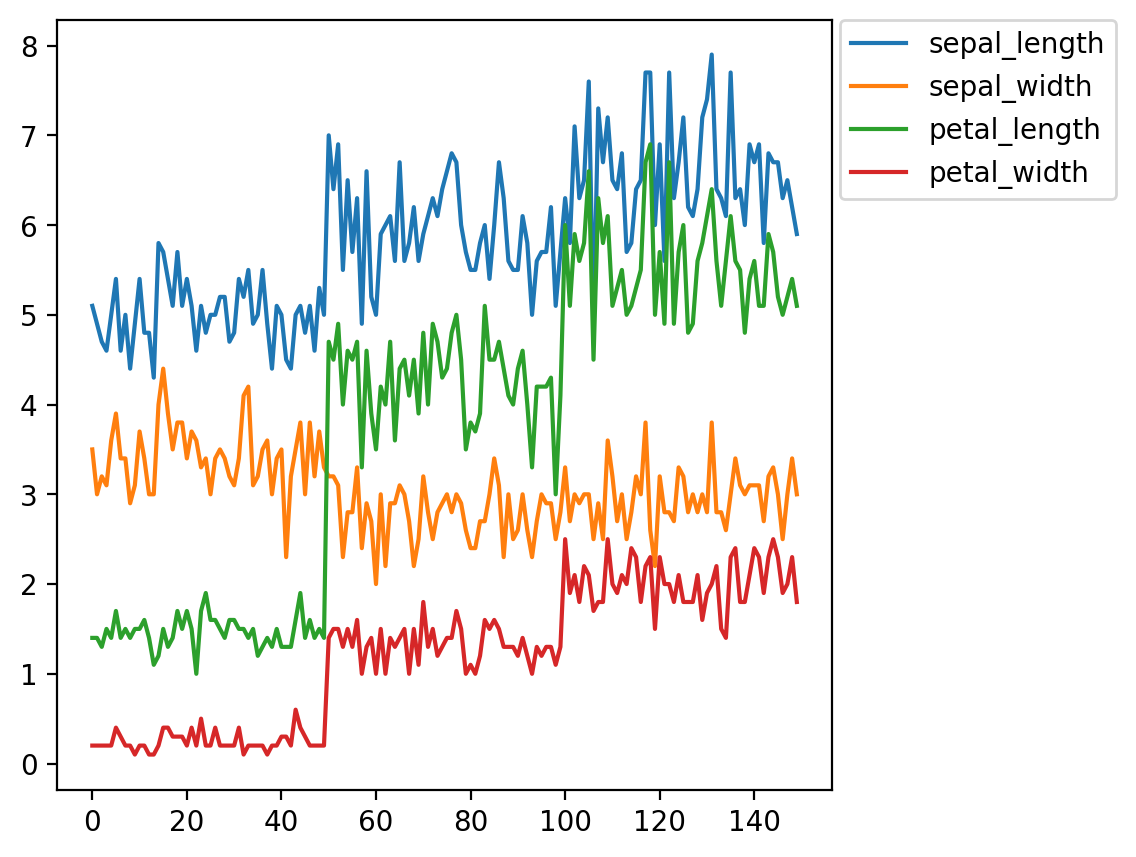

In [81]:
iris.plot(kind='line', figsize=(5,5))
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show()

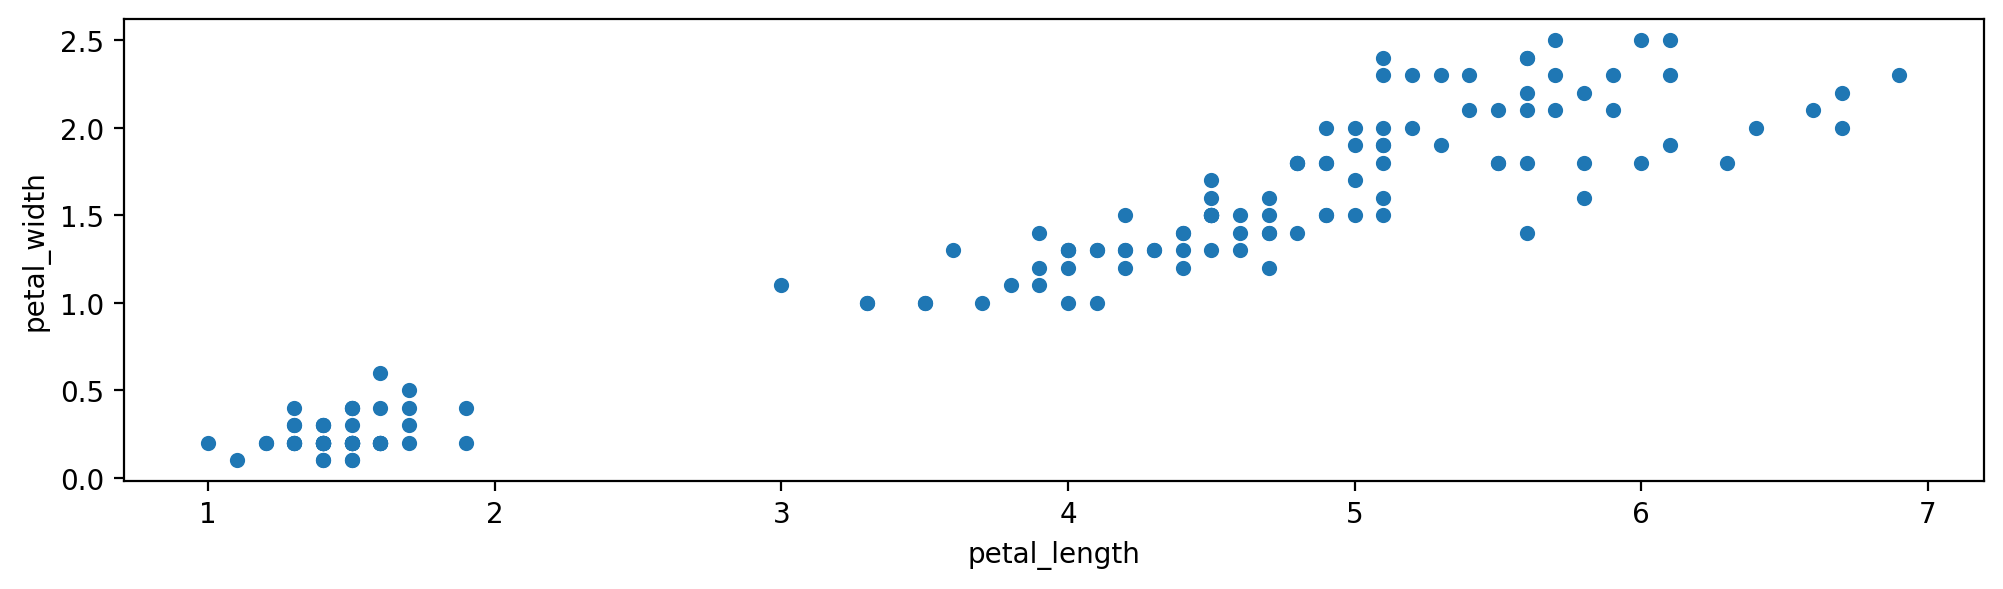

In [83]:
iris.plot(x='petal_length',y='petal_width', kind='scatter', figsize=(12,3))
plt.show()

<Axes: xlabel='petal_length', ylabel='petal_width'>

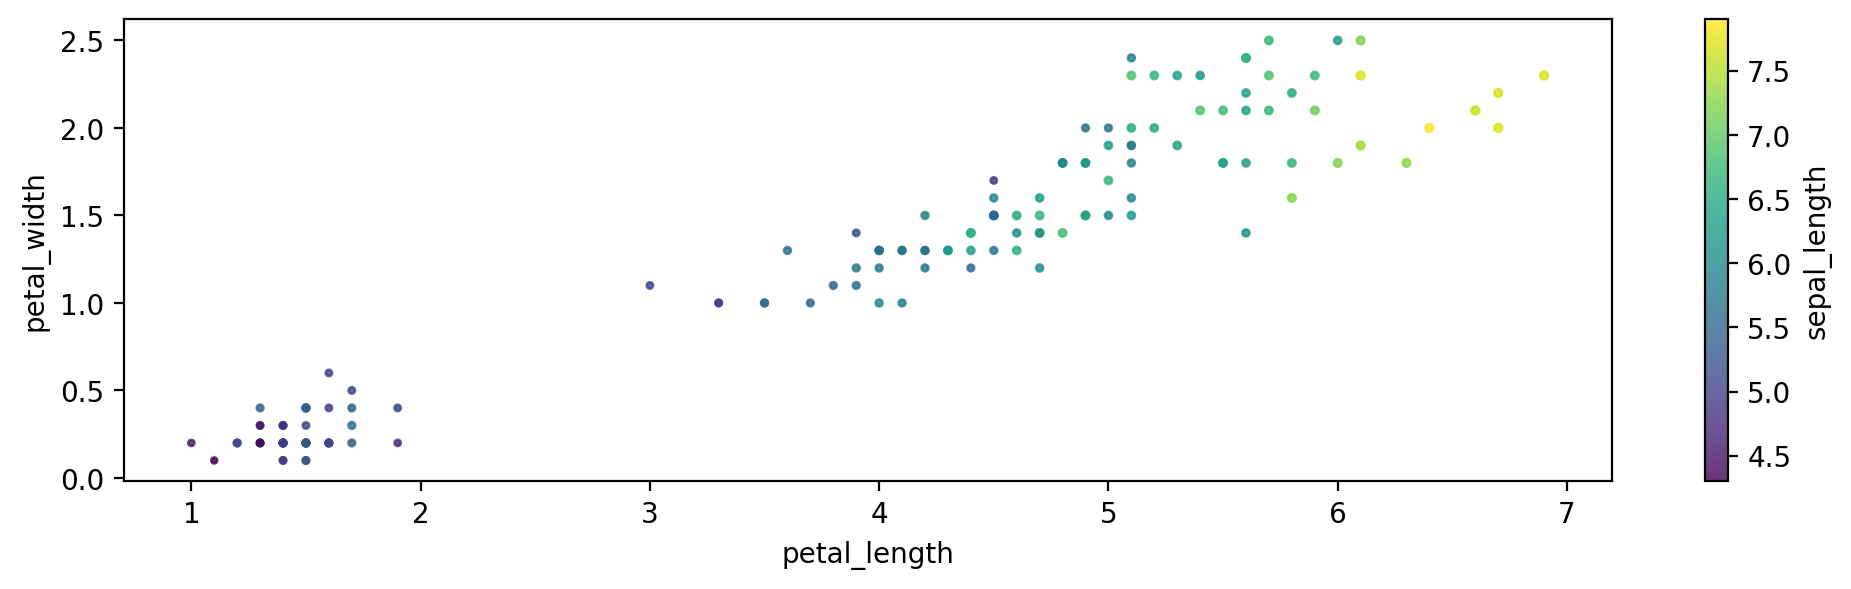

In [86]:
iris.plot(kind='scatter', x='petal_length',y='petal_width', figsize=(12,3), 
          s='sepal_length', # size
          c='sepal_length', # color
          alpha=.8)         # 0<=투명도<=1

<Axes: >

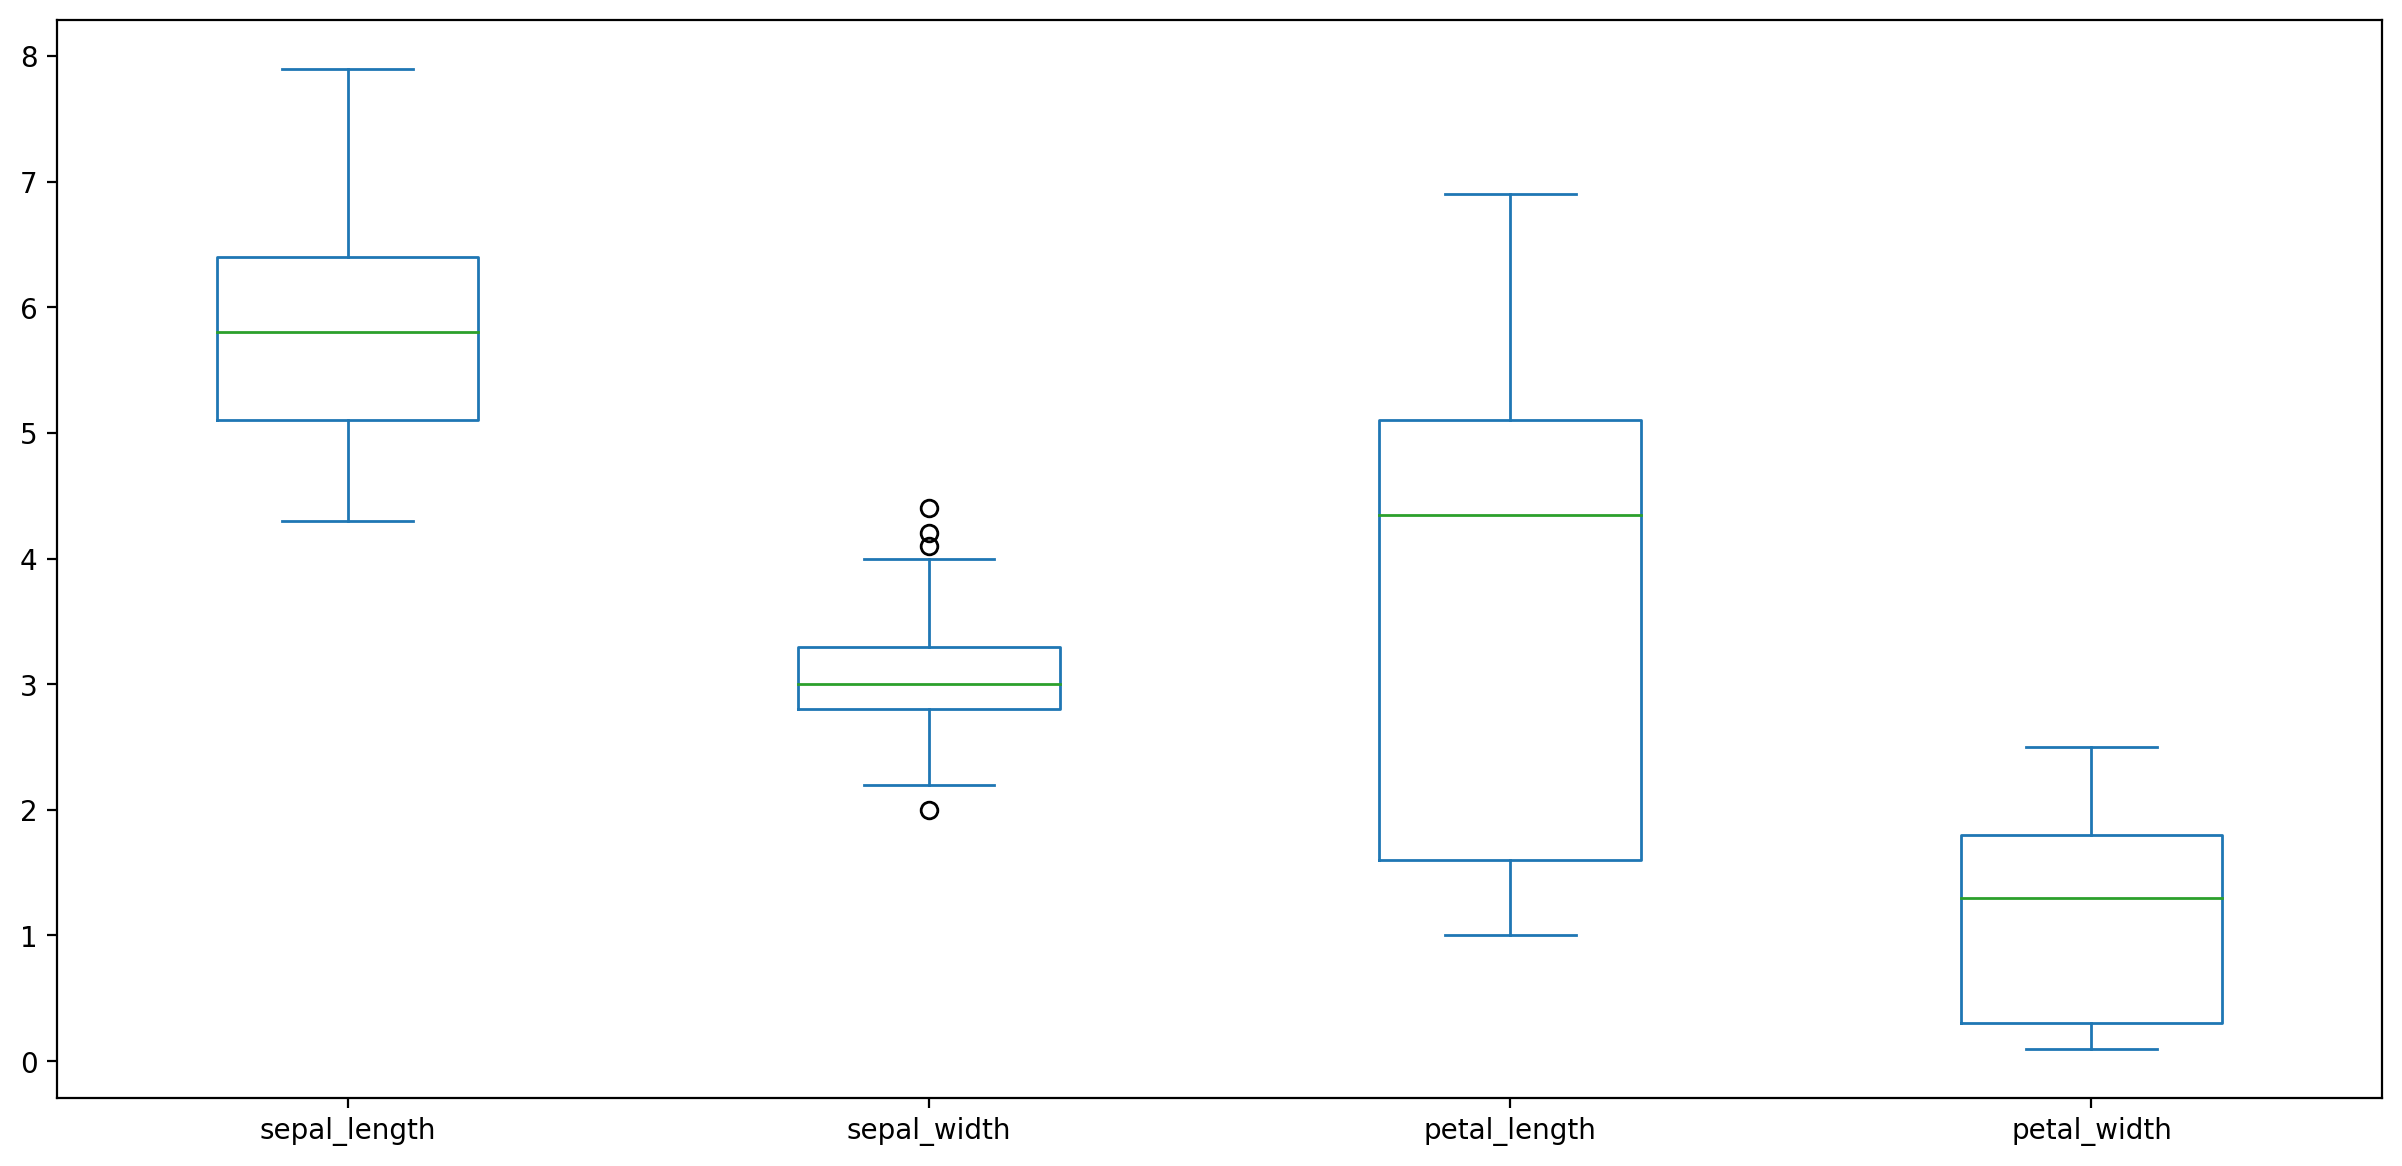

In [87]:
iris.plot(kind='box', figsize=(15,7))

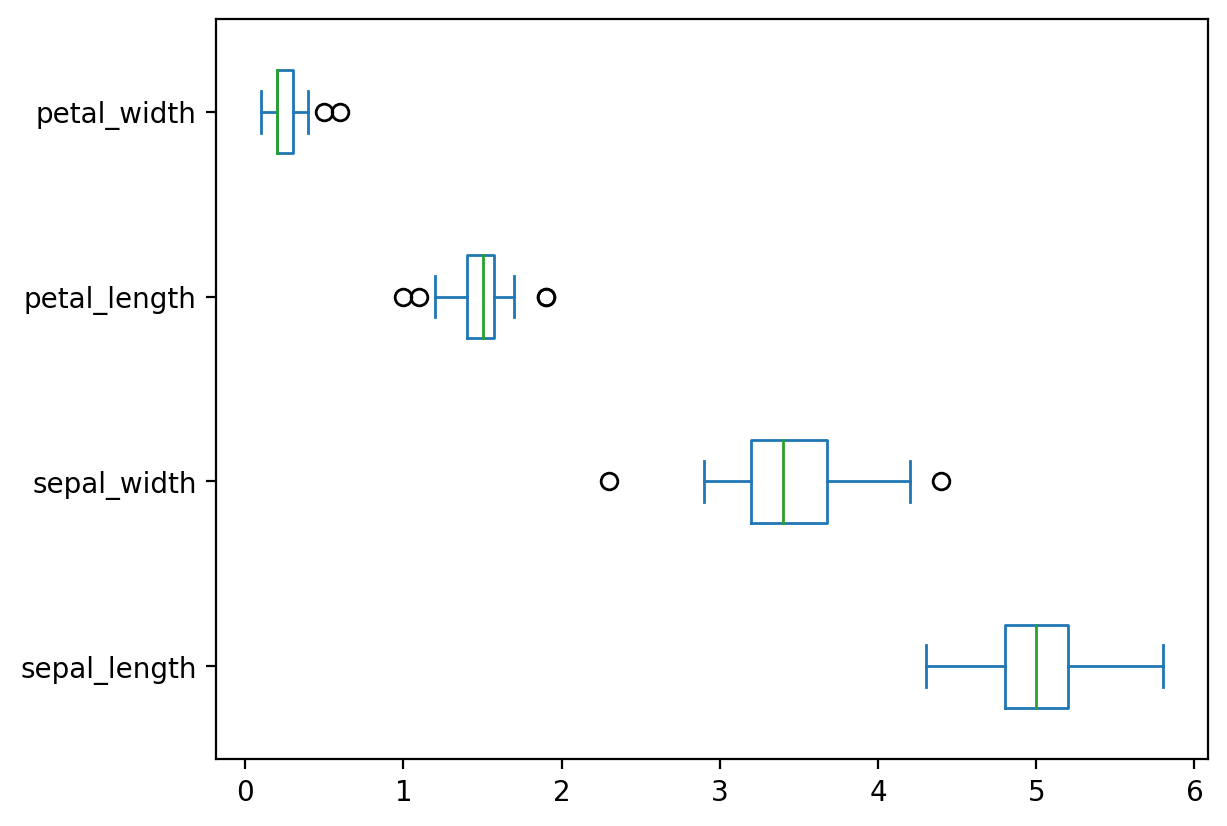

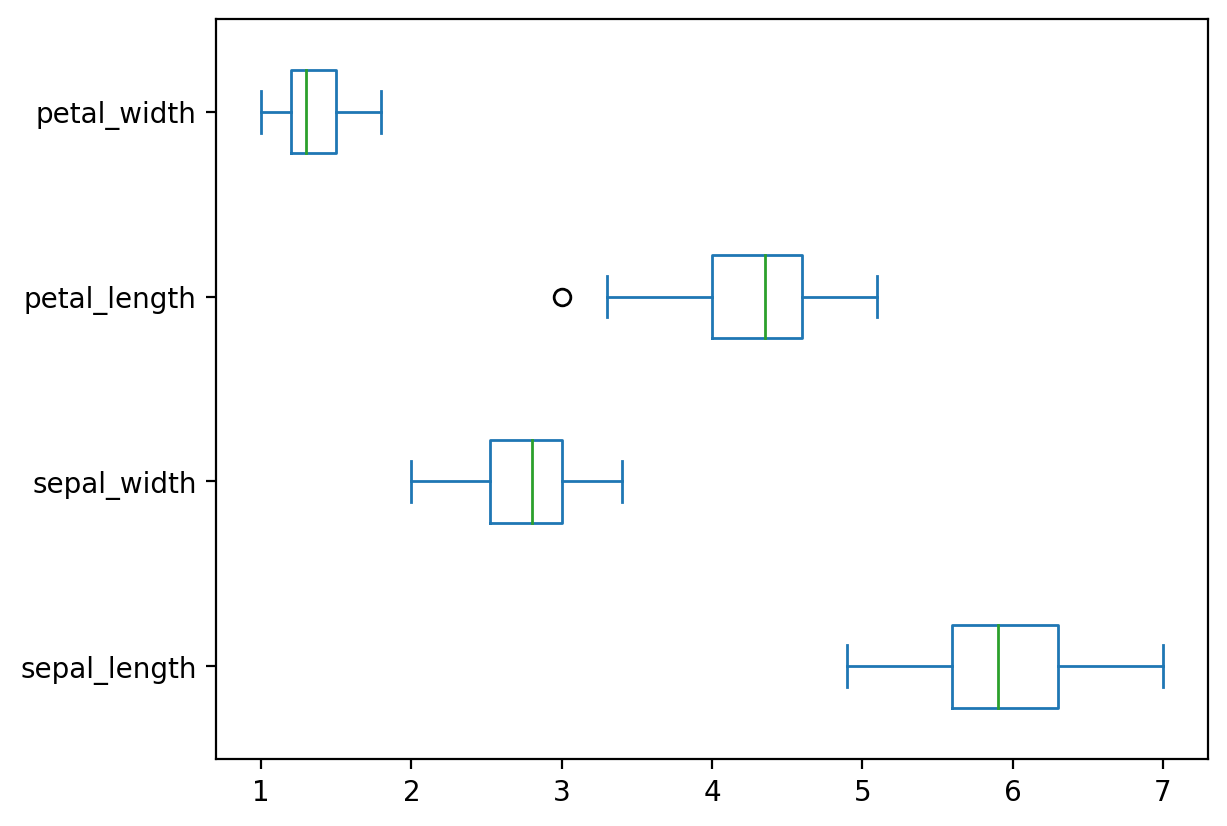

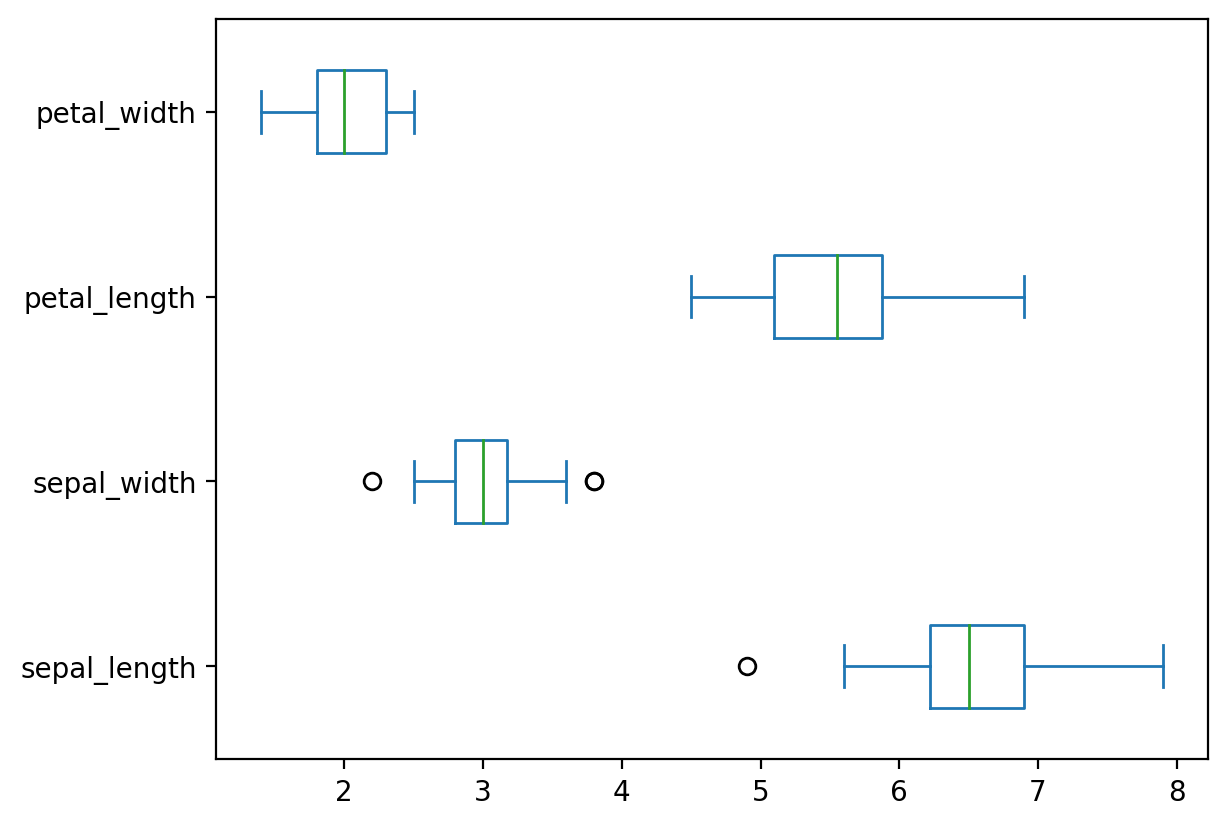

In [116]:
# 종별 boxplot
iris.groupby('species').plot(kind='box',
                            layout=(3,4),
                             vert=False,
                            sharex=True,)
plt.show()

## 1.4 다양한 그래프 그리기
- pyplot 함수들 : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
### 1) plt.scatter() : 산점도

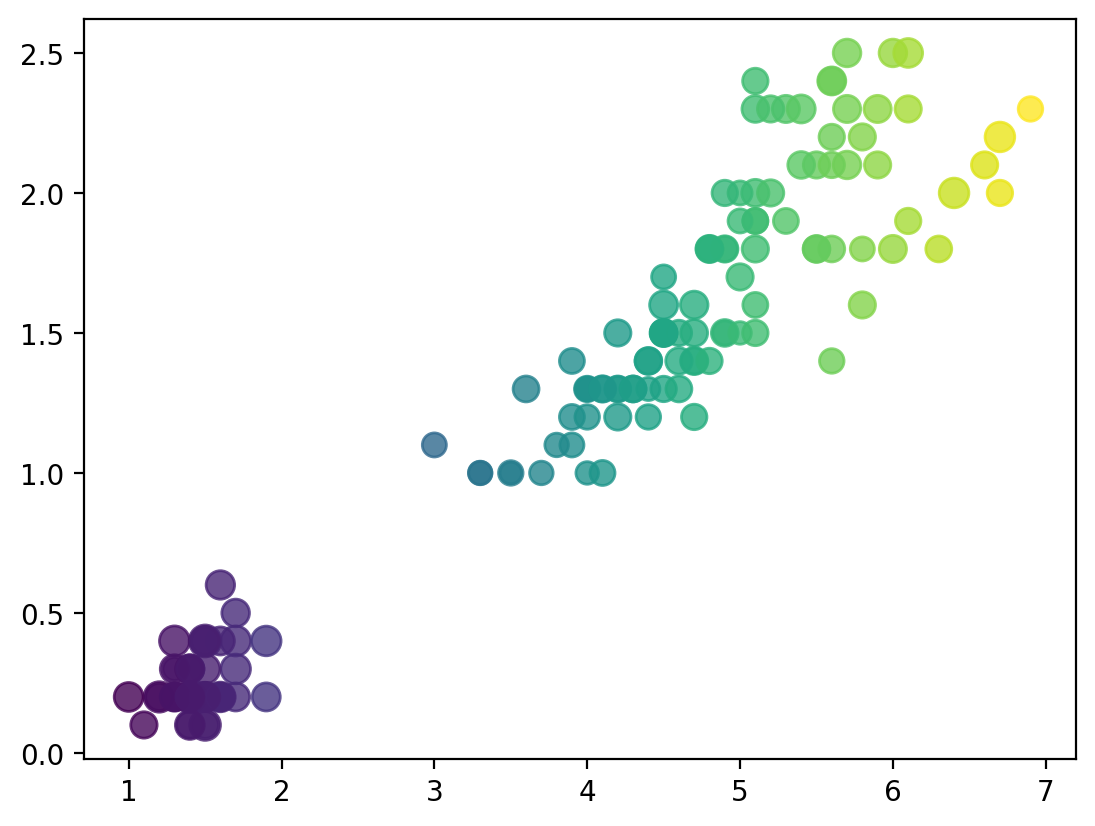

In [121]:
plt.scatter(iris.petal_length, iris.petal_width,
            s=iris.sepal_width*30,
            c=iris.petal_length*20,
            alpha = .8)

### 2) boxplot(단점:분포를 알 수 없음), violinplot()

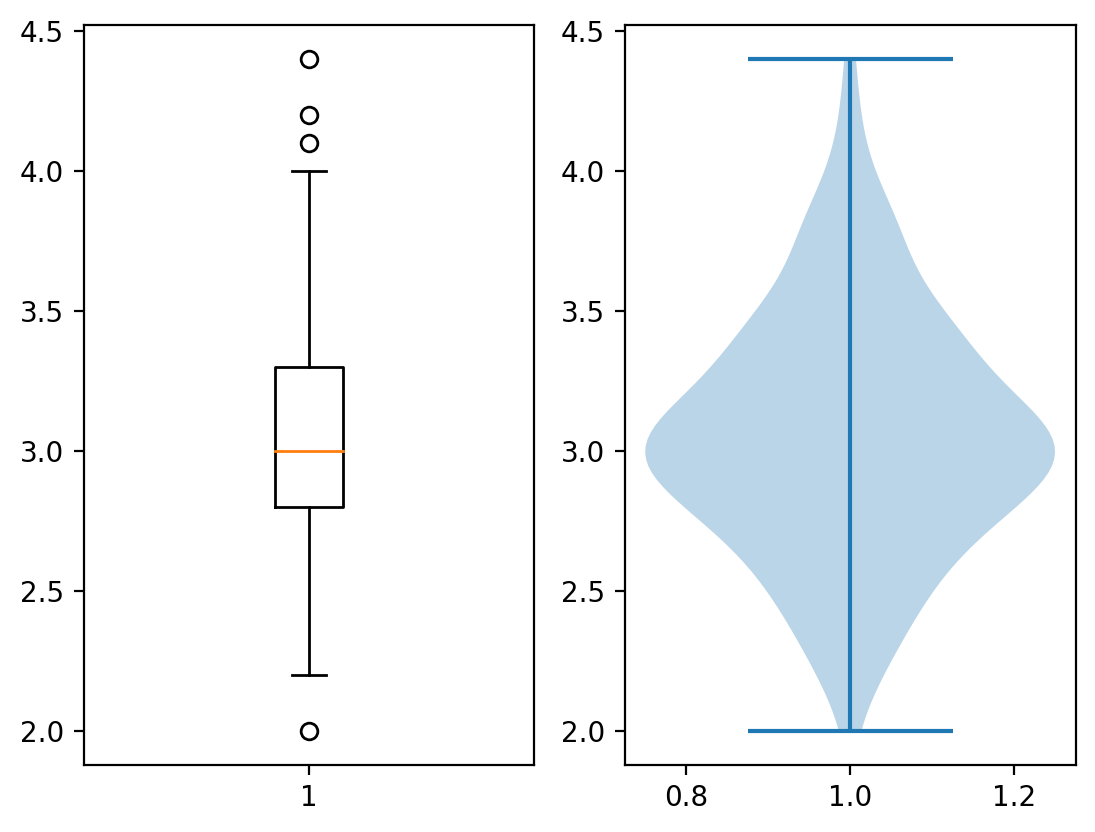

In [125]:
fig, axes = plt.subplots(ncols=2)
axes[0].boxplot(iris.sepal_width)
axes[1].violinplot(iris.sepal_width)
plt.show()

### 3) bar(), barh(), axvline(수직선),  axhline(수평선)


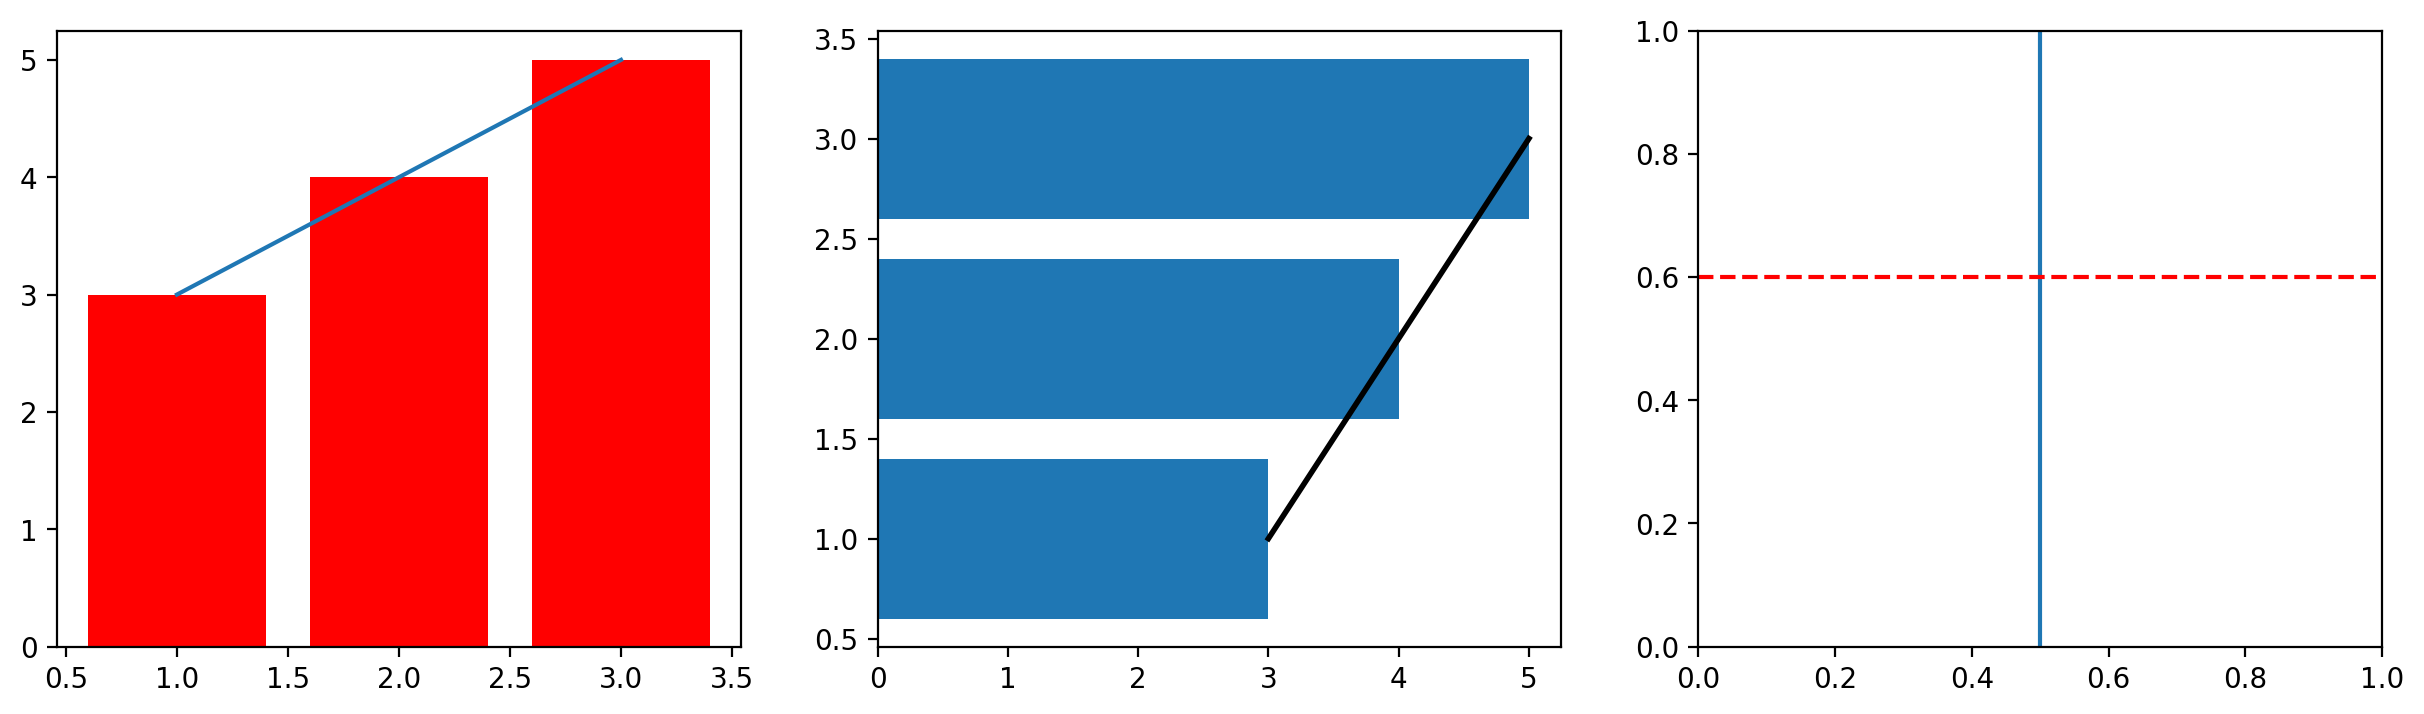

In [136]:
x = [1,2,3]
y = [3,4,5]
fig, axes = plt.subplots(ncols=3, figsize=(15,4))
axes[0].bar(x,y,color='r')
axes[0].plot(x,y)
axes[1].barh(x,y)
axes[1].plot(y,x,'k',linewidth=2)
axes[2].axvline(0.5)
axes[2].axhline(0.6, c='r', linestyle='--')

### 4)hist(도수분포표;histogram)

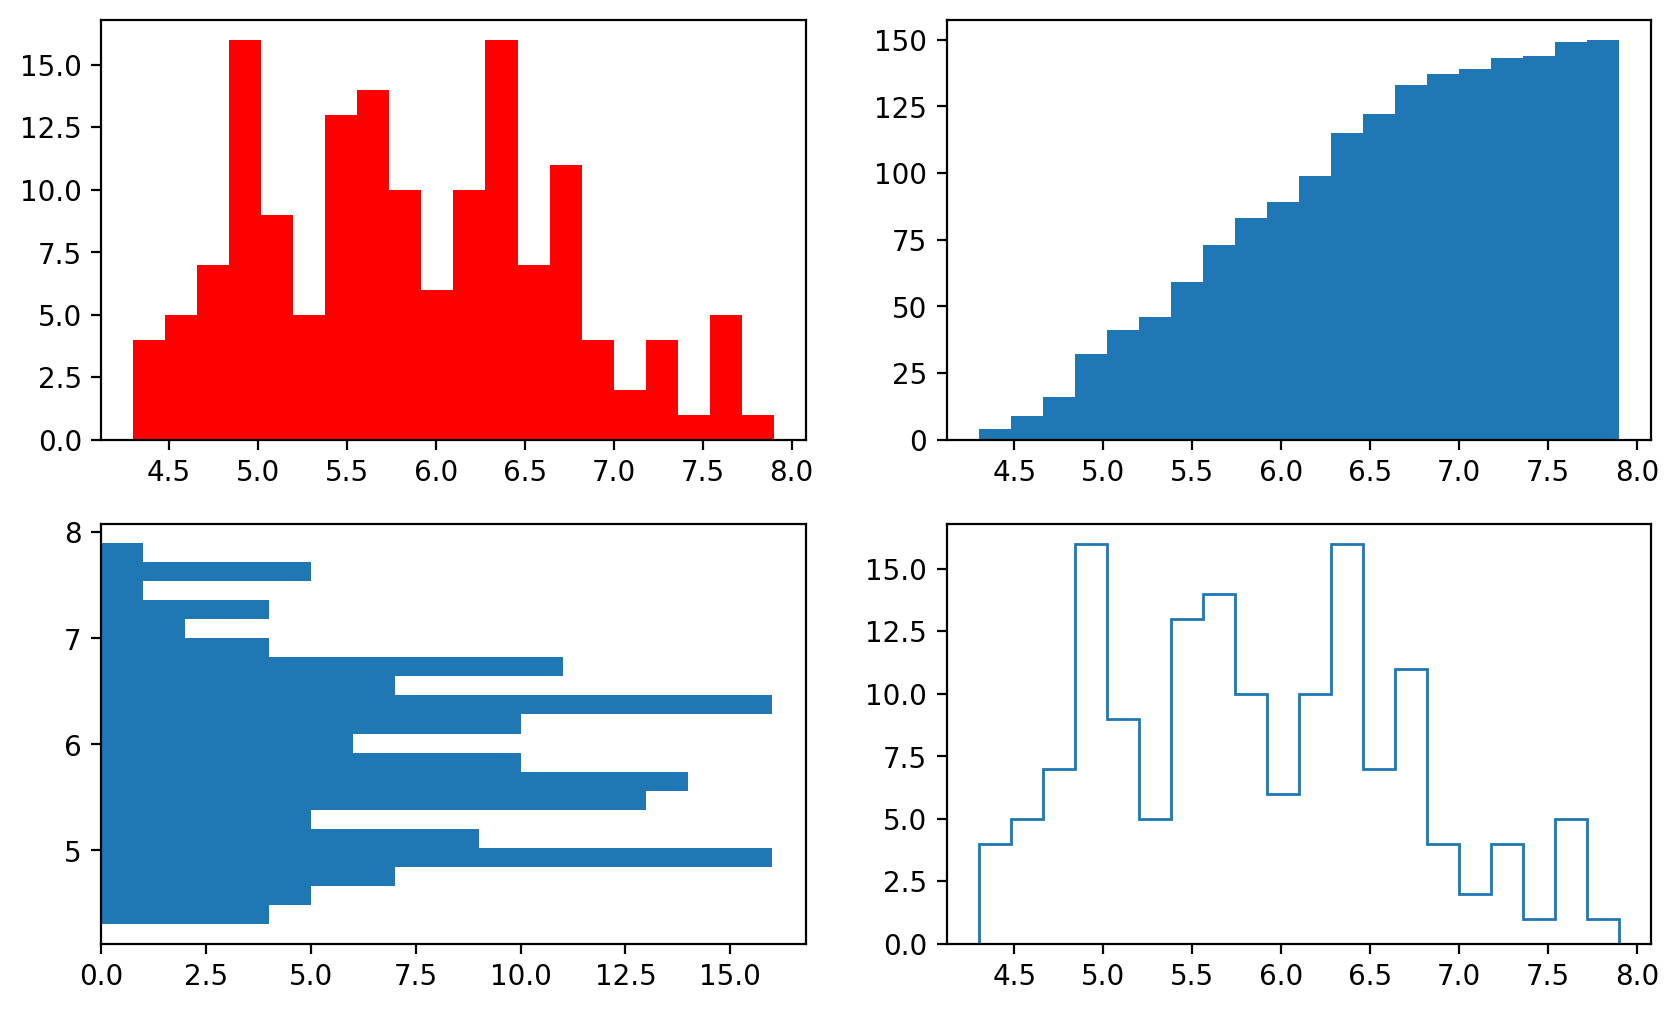

In [149]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
axes[0,0].hist(iris.sepal_length, bins=20, color='r') # 히스토그램
axes[0,1].hist(iris.sepal_length, bins=20, cumulative=True) # 누적히스토그램
axes[1,0].hist(iris.sepal_length, bins=20, orientation='horizontal') # 수평히스토그램
axes[1,1].hist(iris.sepal_length, bins=20, histtype='step')
plt.show()

## 1.5 그래프 커스터마이징
### 1) linestyle, linewidth, color, marker...(plot의 매개변수로 지정)
### 2) text(), annotate(), 

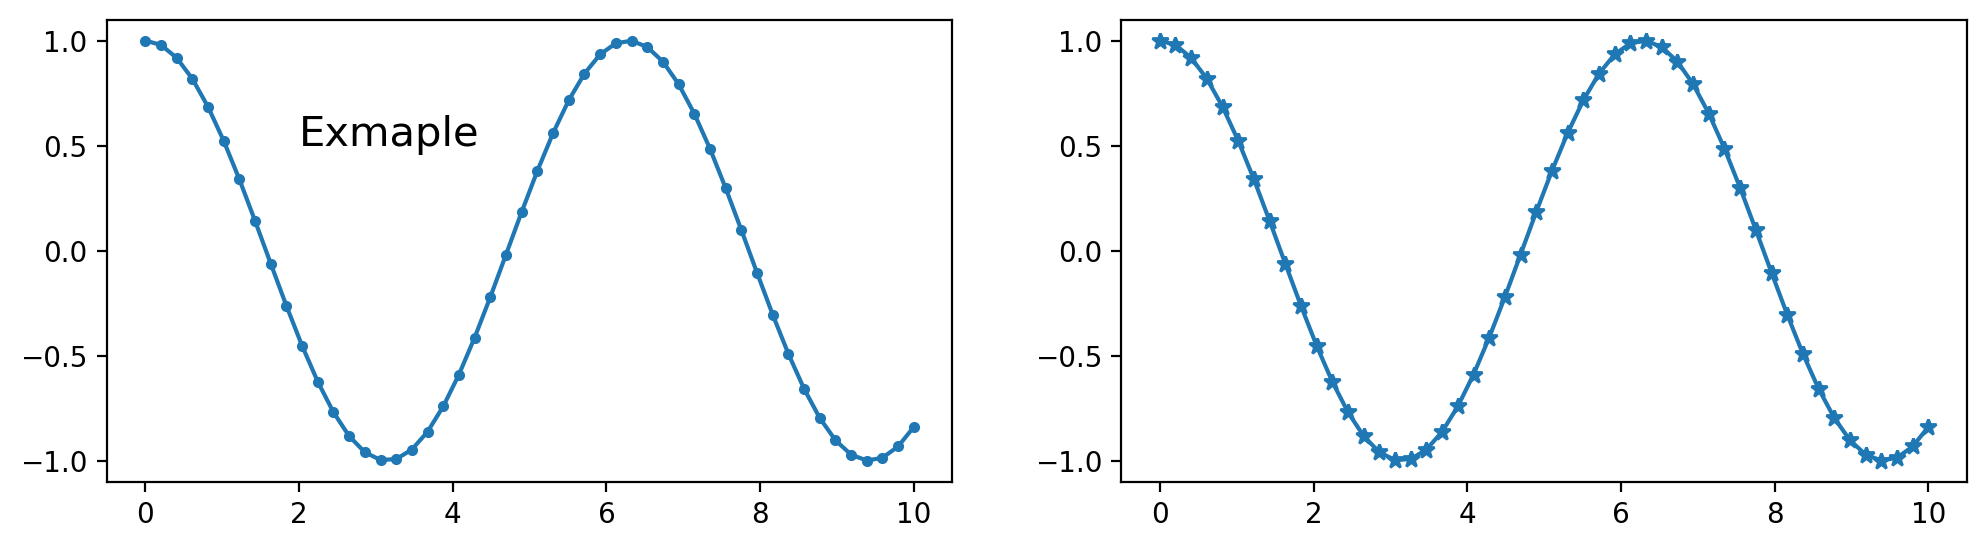

In [162]:
x = np.linspace(0,10)
y = np.cos(x)
fig, axes = plt.subplots(1,2,figsize=(12,3))
axes[0].plot(x,y, marker='.')
axes[0].text(2,0.5, 'Exmaple', fontsize=15)
axes[1].plot(x,y, marker='*')
plt.show()